<h1>Example: Random Walks</h1>

The simulation of random walks provides an illustrative application of utilizing array operations. Let’s first consider a simple random walk starting at 0 with steps of 1 and –1 occurring with equal probability.

Here is a pure Python way to implement a single random walk with 1,000 steps using the built-in `random` module:

In [1]:
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#! blockstart
import random

position = 0
walk = [position]
nsteps = 1000

for _ in range(nsteps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)
#! blockend

example plot of the first 100 values on one of these random walks:

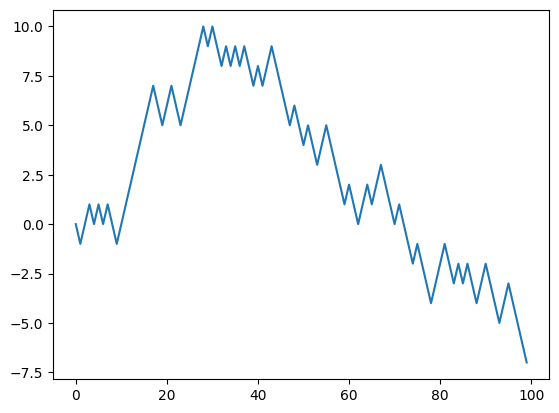

In [3]:
plt.plot(walk[:100])

You might make the observation that `walk` is the cumulative sum of the random steps and could be evaluated as an array expression. Thus, I use the `numpy.random` module to draw 1,000 coin flips at once, set these to 1 and –1, and compute the cumulative sum:

In [4]:
nsteps = 1000

rng = np.random.default_rng(seed=12345)  # fresh random generator

draws = rng.integers(0, 2, size=nsteps)

steps = np.where(draws == 0, 1, -1)

walk = steps.cumsum()

From this we can begin to extract statistics like the minimum and maximum value along the walk’s trajectory:

In [5]:
walk.min()

-8

In [6]:
walk.max()

50

A more complicated statistic is the first crossing time, the step at which the random walk reaches a particular value. Here we might want to know how long it took the random walk to get at least 10 steps away from the origin 0 in either direction. `np.abs(walk) >= 10` gives us a Boolean array indicating where the walk has reached or exceeded 10, but we want the index of the first 10 or –10. Turns out, we can compute this using `argmax`, which returns the first index of the maximum value in the Boolean array (`True` is the maximum value):

In [7]:
(np.abs(walk) >= 10).argmax()

155

Note that using `argmax` here is not always efficient because it always makes a full scan of the array. In this special case, once a `True` is observed we know it to be the maximum value.

<h2>Simulating Many Random Walks at Once</h2>

If your goal was to simulate many random walks, say five thousand of them, you can generate all of the random walks with minor modifications to the preceding code. If passed a 2-tuple, the `numpy.random` functions will generate a two-dimensional array of draws, and we can compute the cumulative sum for each row to compute all five thousand random walks in one shot:

In [8]:
nwalks = 5000

nsteps = 1000

draws = rng.integers(0, 2, size=(nwalks, nsteps)) # 0 or 1

steps = np.where(draws > 0, 1, -1)

walks = steps.cumsum(axis=1)

walks

array([[  1,   2,   3, ...,  22,  23,  22],
       [  1,   0,  -1, ..., -50, -49, -48],
       [  1,   2,   3, ...,  50,  49,  48],
       ...,
       [ -1,  -2,  -1, ..., -10,  -9, -10],
       [ -1,  -2,  -3, ...,   8,   9,   8],
       [ -1,   0,   1, ...,  -4,  -3,  -2]])

Now, we can compute the maximum and minimum values obtained over all of the walks:

In [9]:
walks.max()

114

In [10]:
walks.min()

-120

Out of these walks, let’s compute the minimum crossing time to 30 or –30. This is slightly tricky because not all 5,000 of them reach 30. We can check this using the `any` method:

In [11]:
hits30 = (np.abs(walks) >= 30).any(axis=1)

hits30

array([False,  True,  True, ...,  True, False,  True])

In [12]:

hits30.sum() # Number that hit 30 or -30

3395

We can use this Boolean array to select the rows of `walks` that actually cross the absolute 30 level, and call `argmax` across axis 1 to get the crossing times:

In [13]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(axis=1)

crossing_times

array([201, 491, 283, ..., 219, 259, 541], dtype=int64)

Lastly, we compute the average minimum crossing time:

In [14]:
crossing_times.mean()

500.5699558173785

Feel free to experiment with other distributions for the steps other than equal-sized coin flips. You need only use a different random generator method, like `standard_normal` to generate normally distributed steps with some mean and standard deviation:

In [15]:
draws = 0.25 * rng.standard_normal((nwalks, nsteps))